In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.tree import *

In [126]:
from IPython.display import display

In [36]:
pos_train=pd.read_csv('data/train_Arabic_tweets_positive_20190413.tsv',sep='\t',header=None)
neg_train=pd.read_csv('data/train_Arabic_tweets_negative_20190413.tsv',sep='\t',header=None)
train_data=pd.concat([pos_train,neg_train],ignore_index=True)
train_data.columns=['label','tweet']
del pos_train,neg_train

In [37]:
train_data.head()

,label,tweet
0,pos,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...
1,pos,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...
2,pos,من الخير نفسه 💛
3,pos,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...
4,pos,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...


In [38]:
train_data.isnull().sum()

label    0
tweet    0
dtype: int64

In [39]:
train_data.tail()

,label,tweet
45270,neg,كيف ترى أورانوس لو كان يقع مكان القمر ؟ 💙💙 كوك...
45271,neg,احسدك على الايم 💔
45272,neg,لأول مرة ما بنكون سوا 💔
45273,neg,بقله ليش يا واطي 🤔
45274,neg,قد طال صبري في النوى إذ تركتني كئيبا ؛ غريبا ب...


In [40]:
train_data.duplicated().sum()

15721

In [41]:
train_data[train_data.duplicated()]

,label,tweet
57,pos,بمناسبة فوز الهلال .. 💙 سحب على آيفون XR📱 رتوي...
82,pos,بمناسبة فوز الهلال .. 💙 سحب على آيفون XR📱 رتوي...
111,pos,السحب الليلة على الايفون .. رتويت للمرفقة وطبق...
129,pos,بمناسبة فوز الهلال .. 💙 سحب على آيفون XR📱 رتوي...
142,pos,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...
...,...,...
45269,neg,طبعا سامعين 🙈
45270,neg,كيف ترى أورانوس لو كان يقع مكان القمر ؟ 💙💙 كوك...
45272,neg,لأول مرة ما بنكون سوا 💔
45273,neg,بقله ليش يا واطي 🤔


In [42]:
train_data[train_data['tweet']=='طبعا سامعين 🙈']

,label,tweet
27010,neg,طبعا سامعين 🙈
45269,neg,طبعا سامعين 🙈


In [43]:
train_data.shape

(45275, 2)

* remove duplicates from training data

In [44]:
train_data.drop_duplicates(inplace=True)

In [45]:
train_data.duplicated().sum()

0

In [46]:
train_data[train_data['tweet']=='طبعا سامعين 🙈']

,label,tweet
27010,neg,طبعا سامعين 🙈


<AxesSubplot:xlabel='label', ylabel='count'>

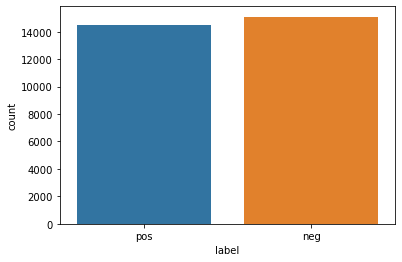

In [47]:
sns.countplot(data=train_data,x='label')

In [48]:
from nltk.stem.snowball import SnowballStemmer
def preprocess(dataset):
    stemmer = SnowballStemmer('arabic')
    dataset['tweet']=dataset['tweet'].apply(lambda x:stemmer.stem(x))
    return dataset


In [49]:
#reading test dataset
test_pos=pd.read_csv("data/test_Arabic_tweets_positive_20190413.tsv",sep='\t',header=None)
test_neg=pd.read_csv("data/test_Arabic_tweets_negative_20190413.tsv",sep='\t',header=None)
test_data=pd.concat([test_pos,test_neg],ignore_index=True)
test_data.columns=['label','tweet']
del test_pos,test_neg

In [50]:
test_data.head()

,label,tweet
0,pos,#الهلال_الاهلي فوز هلالي مهم الحمد لله 💙 زوران...
1,pos,صباحك خيرات ومسرات 🌸
2,pos,#تأمل قال الله ﷻ :- _*​﴿بواد غير ذي زرع ﴾*_ 💫💫...
3,pos,😂😂 يا جدعان الرجاله اللي فوق ال دول خطر ع تويت...
4,pos,رساله صباحيه : 💛 اللهم اسألك التوفيق في جميع ا...


In [51]:
test_data.tail()

,label,tweet
11515,neg,النوم وانت مكسور ده احساس غبي اللي هو مش قادر ...
11516,neg,استشهاد_الامام_كاظم_الغيظ السلام على المعذب في...
11517,neg,انا كنت اكل الصحن بكبره 😐
11518,neg,قولوا لي ايش تشوفوا .. مع ملاحظة التلطف لأنه ا...
11519,neg,✍ إذا أردت أن تعرف شيئا عني إسالني قبل أن تسأل...


In [52]:
training_data=preprocess(train_data)
testing_data=preprocess(test_data)

In [53]:
from sklearn.svm import SVC

In [83]:
vectorizer=TfidfVectorizer(analyzer='char_wb',ngram_range=(3,5),min_df=0.01,max_df=0.3)

In [84]:
clf=SVC(kernel='rbf')

In [85]:
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(vectorizer,clf)

In [86]:
pipe.fit(training_data.tweet,training_data.label)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='char_wb', max_df=0.3, min_df=0.01,
                                 ngram_range=(3, 5))),
                ('svc', SVC())])

In [87]:
y_pred=pipe.predict(testing_data.tweet)

In [91]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve,auc,RocCurveDisplay,classification_report

In [89]:
accuracy_score(testing_data.label,y_pred)

0.8642361111111111

In [93]:
print(classification_report(testing_data.label,y_pred))

              precision    recall  f1-score   support

         neg       0.89      0.83      0.86      5768
         pos       0.84      0.90      0.87      5752

    accuracy                           0.86     11520
   macro avg       0.87      0.86      0.86     11520
weighted avg       0.87      0.86      0.86     11520



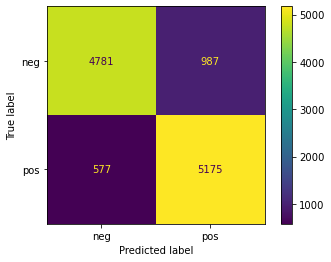

In [90]:
cm = confusion_matrix(testing_data.label, y_pred, labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=pipe.classes_)
disp.plot()
plt.show()

In [94]:
y_label=np.array([1 if x=='pos' else 0 for x in testing_data.label])

In [95]:
predictions=np.array([1 if x=='pos' else 0 for x in y_pred])

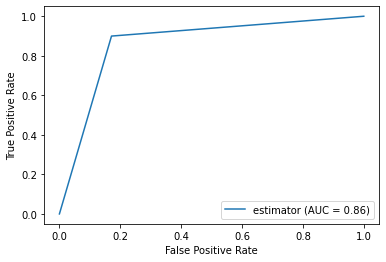

In [96]:
fpr, tpr, thresholds = roc_curve(y_label, predictions)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='estimator')
display.plot()
plt.show()

In [99]:
clf2=RandomForestClassifier()
pipe2=make_pipeline(vectorizer,clf2)
pipe2.fit(training_data.tweet,training_data.label)
pred=pipe2.predict(testing_data.tweet)

In [100]:
print(classification_report(testing_data.label,pred))

              precision    recall  f1-score   support

         neg       0.90      0.88      0.89      5768
         pos       0.88      0.90      0.89      5752

    accuracy                           0.89     11520
   macro avg       0.89      0.89      0.89     11520
weighted avg       0.89      0.89      0.89     11520



In [101]:
print('Score:',accuracy_score(testing_data.label,pred))

Score: 0.8883680555555555


In [119]:
import eli5

In [131]:
for _, row in testing_data.sample(5).iterrows():
    print(f"true label: {row['label']}")
    display(eli5.show_prediction(clf2, row['tweet'], vec=vectorizer,top=2))
    print("--"*50)

true label: pos


----------------------------------------------------------------------------------------------------
true label: pos


----------------------------------------------------------------------------------------------------
true label: pos


----------------------------------------------------------------------------------------------------
true label: pos


----------------------------------------------------------------------------------------------------
true label: pos


----------------------------------------------------------------------------------------------------
